In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#import
suicide_df = pd.read_csv("Suicides_per_year.csv")
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
gender_df= suicide_df["sex"]
gender_df

0          male
1          male
2        female
3          male
4          male
          ...  
27815    female
27816    female
27817      male
27818    female
27819    female
Name: sex, Length: 27820, dtype: object

In [4]:
male_df = suicide_df.loc[suicide_df["sex"]== "male",:]
male_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation


In [5]:
male_dfg = male_df.groupby(["year"]).mean()["suicides/100k pop"]
male_dfg.head()

year
1985    17.875486
1986    17.033993
1987    17.556296
1988    19.095408
1989    19.581314
Name: suicides/100k pop, dtype: float64

In [6]:
female_df = suicide_df.loc[suicide_df["sex"] == "female",:]
female_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [7]:
female_dfg= female_df.groupby(["year"]).mean()["suicides/100k pop"]
female_dfg.head()

year
1985    5.776910
1986    5.812674
1987    5.732130
1988    6.323401
1989    6.176827
Name: suicides/100k pop, dtype: float64

In [8]:
combined_t = pd.DataFrame({"Male World Suicide Rate": male_dfg,
                       "Female World Suicide Rate": female_dfg})
combined_t.head()

,Male World Suicide Rate,Female World Suicide Rate
year,,
1985,17.875486,5.776910
1986,17.033993,5.812674
1987,17.556296,5.732130
1988,19.095408,6.323401
1989,19.581314,6.176827


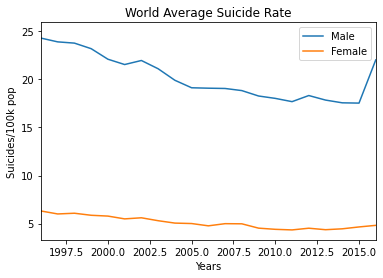

In [9]:
plt.plot(combined_t["Male World Suicide Rate"], label="Male")
plt.plot(combined_t["Female World Suicide Rate"], label="Female")
plt.title('World Average Suicide Rate')
plt.xlabel('Years')
plt.ylabel('Suicides/100k pop')
plt.xlim(1996,2016)
plt.legend()
plt.show()

In [10]:
usa_male = male_df.loc[male_df["country"] == "United States",:]
usa_male.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [11]:
usa_male_group = usa_male.groupby(["year"]).mean()["suicides/100k pop"]
usa_male_group.head()

year
1985    25.476667
1986    26.381667
1987    26.591667
1988    26.106667
1989    25.460000
Name: suicides/100k pop, dtype: float64

In [12]:
usa_female = female_df.loc[female_df["country"] == "United States",:]
usa_female.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26853,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,"4,346,734,000,000",19693,Silent
26854,United States,1985,female,55-74 years,1568,21366000,7.34,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26855,United States,1985,female,75+ years,466,7469000,6.24,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26856,United States,1985,female,25-34 years,1242,21041000,5.90,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26857,United States,1985,female,15-24 years,854,19589000,4.36,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [13]:
usa_female_group = usa_female.groupby(["year"]).mean()["suicides/100k pop"]
usa_female_group.head()

year
1985    5.310000
1986    5.560000
1987    5.351667
1988    5.178333
1989    4.946667
Name: suicides/100k pop, dtype: float64

In [14]:
usa_combined = pd.DataFrame({"USA Male Suicide Rate": usa_male_group,
                             "USA Female Suicide Rate": usa_female_group})
usa_combined.head()

,USA Male Suicide Rate,USA Female Suicide Rate
year,,
1985,25.476667,5.310000
1986,26.381667,5.560000
1987,26.591667,5.351667
1988,26.106667,5.178333
1989,25.460000,4.946667


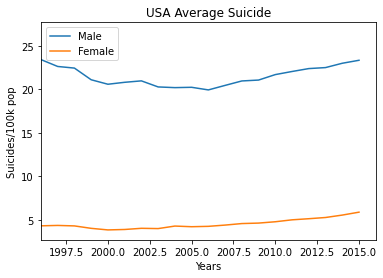

In [15]:
plt.plot(usa_combined["USA Male Suicide Rate"], label="Male")
plt.plot(usa_combined["USA Female Suicide Rate"], label="Female")
plt.title('USA Average Suicide')
plt.xlabel('Years')
plt.ylabel('Suicides/100k pop')
plt.xlim(1996,2016)
plt.legend()
plt.show()

In [16]:
mil_male = male_df.loc[male_df["generation"] == "Millenials",:]
mil_male.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
46,Albania,1992,male,5-14 years,0,362900,0.00,Albania1992,NaN,"709,452,584",251,Millenials
58,Albania,1993,male,5-14 years,1,367000,0.27,Albania1993,NaN,"1,228,071,038",437,Millenials
70,Albania,1994,male,5-14 years,1,371800,0.27,Albania1994,NaN,"1,985,673,798",697,Millenials
81,Albania,1995,male,5-14 years,6,376500,1.59,Albania1995,0.619,"2,424,499,009",835,Millenials
94,Albania,1996,male,5-14 years,2,380400,0.53,Albania1996,NaN,"3,314,898,292",1127,Millenials


In [17]:
mil_male_group = mil_male.groupby(["year"]).mean()["suicides/100k pop"]
mil_male_group.head()

year
1991    0.656406
1992    0.731692
1993    1.006462
1994    0.770882
1995    0.812564
Name: suicides/100k pop, dtype: float64

In [18]:
mil_female = female_df.loc[female_df["generation"] == "Millenials",:]
mil_female.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
44,Albania,1992,female,5-14 years,0,336700,0.00,Albania1992,NaN,"709,452,584",251,Millenials
57,Albania,1993,female,5-14 years,1,340300,0.29,Albania1993,NaN,"1,228,071,038",437,Millenials
71,Albania,1994,female,5-14 years,0,344400,0.00,Albania1994,NaN,"1,985,673,798",697,Millenials
83,Albania,1995,female,5-14 years,2,348700,0.57,Albania1995,0.619,"2,424,499,009",835,Millenials
95,Albania,1996,female,5-14 years,1,354100,0.28,Albania1996,NaN,"3,314,898,292",1127,Millenials


In [19]:
mil_female_group = mil_female.groupby(["year"]).mean()["suicides/100k pop"]
mil_female_group.head()

year
1991    0.480156
1992    0.434000
1993    0.546308
1994    0.479118
1995    0.393974
Name: suicides/100k pop, dtype: float64

In [20]:
world_mil = pd.DataFrame({"Male World Millennial Suicide Rate": mil_male_group,
                          "Female World Millennial Suicide Rate": mil_female_group})
world_mil.head()

,Male World Millennial Suicide Rate,Female World Millennial Suicide Rate
year,,
1991,0.656406,0.480156
1992,0.731692,0.434000
1993,1.006462,0.546308
1994,0.770882,0.479118
1995,0.812564,0.393974


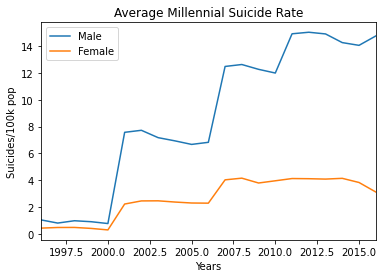

In [21]:
plt.plot(world_mil["Male World Millennial Suicide Rate"], label="Male")
plt.plot(world_mil["Female World Millennial Suicide Rate"], label="Female")
plt.title('Average Millennial Suicide Rate')
plt.xlabel('Years')
plt.ylabel('Suicides/100k pop')
plt.xlim(1996,2016)
plt.legend()
plt.show()

In [22]:
mil_usa_male = usa_male.loc[usa_male["generation"] == "Millenials",:]
mil_usa_male.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26930,United States,1991,male,5-14 years,208,18388000,1.13,United States1991,NaN,"6,174,043,000,000",26503,Millenials
26942,United States,1992,male,5-14 years,232,18668200,1.24,United States1992,NaN,"6,539,299,000,000",27760,Millenials
26954,United States,1993,male,5-14 years,233,18972100,1.23,United States1993,NaN,"6,878,718,000,000",28891,Millenials
26966,United States,1994,male,5-14 years,234,19259500,1.21,United States1994,NaN,"7,308,755,000,000",30375,Millenials
26978,United States,1995,male,5-14 years,260,19528500,1.33,United States1995,0.876,"7,664,060,000,000",31518,Millenials


In [23]:
mil_usa_male_group = mil_usa_male.groupby(["year"]).mean()["suicides/100k pop"]
mil_usa_male_group.head()

year
1991    1.13
1992    1.24
1993    1.23
1994    1.21
1995    1.33
Name: suicides/100k pop, dtype: float64

In [24]:
mil_usa_female = usa_female.loc[usa_female["generation"] == "Millenials",:]
mil_usa_female.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26931,United States,1991,female,5-14 years,58,17520000,0.33,United States1991,NaN,"6,174,043,000,000",26503,Millenials
26943,United States,1992,female,5-14 years,82,17783300,0.46,United States1992,NaN,"6,539,299,000,000",27760,Millenials
26955,United States,1993,female,5-14 years,88,18078200,0.49,United States1993,NaN,"6,878,718,000,000",28891,Millenials
26967,United States,1994,female,5-14 years,88,18351800,0.48,United States1994,NaN,"7,308,755,000,000",30375,Millenials
26979,United States,1995,female,5-14 years,77,18606000,0.41,United States1995,0.876,"7,664,060,000,000",31518,Millenials


In [25]:
mil_usa_female_group = mil_usa_female.groupby(["year"]).mean()["suicides/100k pop"]
mil_usa_female_group.head()

year
1991    0.33
1992    0.46
1993    0.49
1994    0.48
1995    0.41
Name: suicides/100k pop, dtype: float64

In [26]:
usa_mil = pd.DataFrame({"Year" : mil_usa_male_group.index,
                        "Male USA Millennial Suicide Rate": mil_usa_male_group,
                        "Female USA Millennial Suicide Rate": mil_usa_female_group
                        })
usa_mil.head()

,Year,Male USA Millennial Suicide Rate,Female USA Millennial Suicide Rate
year,,,
1991,1991,1.13,0.33
1992,1992,1.24,0.46
1993,1993,1.23,0.49
1994,1994,1.21,0.48
1995,1995,1.33,0.41


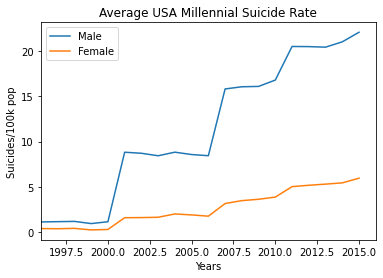

In [27]:
plt.plot(usa_mil["Male USA Millennial Suicide Rate"], label="Male")
plt.plot(usa_mil["Female USA Millennial Suicide Rate"], label="Female")
plt.title('Average USA Millennial Suicide Rate')
plt.xlabel('Years')
plt.ylabel('Suicides/100k pop')
plt.xlim(1996,2016)
plt.legend()
plt.show()